In [1]:
import urllib.request as urllib2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to calculate similarity between two words uses GoogleNews-vectors-negative300 pretrained model
def get_similarity(x, y):
    response = urllib2.urlopen("http://127.0.0.1:5000/word2vec/similarity?w1=" + x + "&w2=" + y)
    html = response.read()
    similarity = eval(html.decode('ASCII')) #convert binary data to ASCII then convert string to decimal using eval
    
    return similarity

In [3]:
data = pd.read_csv('data.csv', delimiter=',')
x = data['Word 1'].values
y = data['Word 2'].values
human_dist = data['Human (mean)'].values

In [4]:
similarity = np.zeros(x.shape[0])

In [5]:
for i in range(x.shape[0]):
    similarity[i] = 10*get_similarity(x[i], y[i])

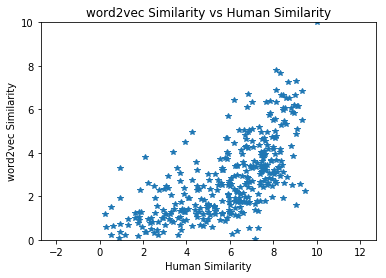

In [6]:
plt.axis('equal')
plt.plot(human_dist, similarity, '*')
plt.title('word2vec Similarity vs Human Similarity')
plt.ylabel('word2vec Similarity')
plt.xlabel('Human Similarity')
plt.axis([0, 10, 0, 10])
plt.savefig("word2vecSimilarityvsHumanSimilarity.png", dpi = 200)